In [2]:
import pandas as pd
from pathlib import Path
import csv
import requests
import json
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path

image_directory = Path("../Images")

mb_data = Path("../jeff_analysis/final_1688.csv")
budget_analysis_main_df = pd.read_csv(mb_data)
budget_analysis_main_df.info()
budget_analysis_main_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1598 non-null   object 
 1   revenue            1598 non-null   int64  
 2   budget             1598 non-null   int64  
 3   profit             1598 non-null   int64  
 4   main_genre         1598 non-null   object 
 5   Runtime(Mins)      1598 non-null   int64  
 6   Year               1598 non-null   int64  
 7   original_language  1598 non-null   object 
 8   Director_O         1595 non-null   object 
 9   Actors_O           1598 non-null   object 
 10  Rating             1598 non-null   float64
 11  Metascore_O        1598 non-null   int64  
 12  Rotten_Tomato_O    1598 non-null   float64
 13  Award Wins         1598 non-null   int64  
 14  Award Nominations  1598 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 187.4+ KB


Index(['title', 'revenue', 'budget', 'profit', 'main_genre', 'Runtime(Mins)',
       'Year', 'original_language', 'Director_O', 'Actors_O', 'Rating',
       'Metascore_O', 'Rotten_Tomato_O', 'Award Wins', 'Award Nominations'],
      dtype='object')

In [4]:
import pandas as pd

bins = [0, 15100000, 32100000, 57100000, 100100000, 380000000]
groups = ["bin 1", "bin 2", "bin 3", "bin 4", "bin 5"]

budget_analysis_main_df['bin_labels'] = pd.cut(budget_analysis_main_df['budget'], bins=bins, labels=groups, right=False)

budget_analysis_main_df.head()


,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,bin_labels
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,0.87,159,220,bin 5
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,0.73,0,0,bin 5
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,0.94,163,164,bin 5
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,0.82,91,131,bin 5
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,0.91,39,81,bin 5


In [5]:
budget_analysis_main_df.rename(columns={"bin_labels": "budget_bins"}, inplace=True)
budget_analysis_main_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,0.87,159,220,bin 5
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,0.73,0,0,bin 5
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,0.94,163,164,bin 5
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,0.82,91,131,bin 5
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,0.91,39,81,bin 5


C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\558612522.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()


9.487729036781154


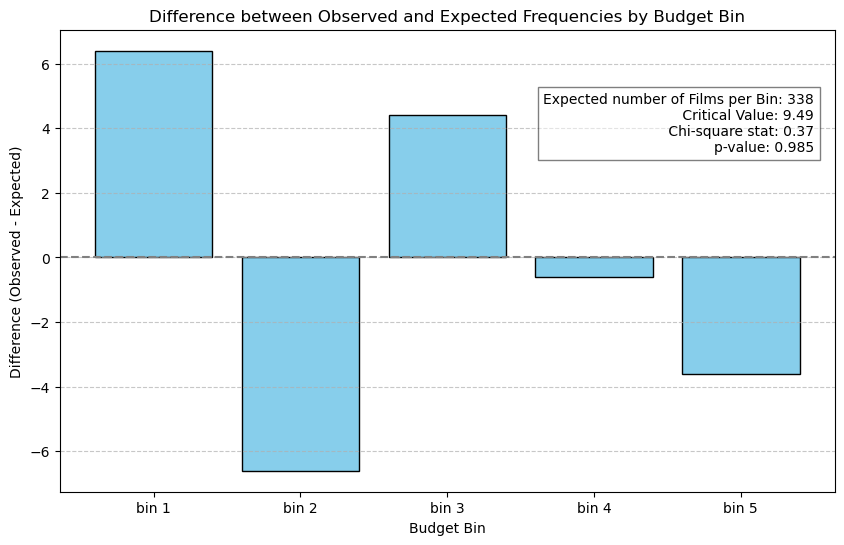

In [6]:
#Running a chi-square analysis to hopefully retain the null hypothesis that the budget_bins are evenly distributed

from scipy import stats

budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()
chi_bins_df = pd.DataFrame(budget_bin_count)
chi_bins_df[1] = 319.6
chi_bins_df.columns = ["actual", "even_dist"]
chi_bins_df.head()

critical_value = stats.chi2.ppf(q = 0.95, df = 4)
print(critical_value)
stats.chisquare(chi_bins_df['actual'], chi_bins_df['even_dist'])

chi_bins_df['difference'] = chi_bins_df['actual'] - chi_bins_df['even_dist']

plt.figure(figsize=(10, 6))
plt.bar(chi_bins_df.index, chi_bins_df['difference'], color='skyblue', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--')  # Add horizontal line at y=0 for reference
plt.title('Difference between Observed and Expected Frequencies by Budget Bin')
plt.xlabel('Budget Bin')
plt.ylabel('Difference (Observed - Expected)')
plt.xticks(chi_bins_df.index)  # Set x-ticks as budget bin indices
plt.grid(axis='y', linestyle='--', alpha=0.7)

chi2_stat, p_val = stats.chisquare(chi_bins_df['actual'], chi_bins_df['even_dist'])
plt.annotate(f'Expected number of Films per Bin: 338\n Critical Value: {critical_value:.2f}\n Chi-square stat: {chi2_stat:.2f}\np-value: {p_val:.3f}',
             xy=(1, 1), xycoords='axes fraction',
             fontsize=10, ha='right', va='top', xytext=(-15, -45), textcoords='offset points',
             bbox=dict(facecolor='white', alpha=0.5))

image_name = "Budget Bin Frequencies vs Expected.png"
image_path = image_directory / image_name

plt.savefig(image_path)


In [7]:
rating = budget_analysis_main_df["Rotten_Tomato_O"] < 1.01
budget_analysis_main_df.loc[rating, 'Rotten_Tomato_O'] = (budget_analysis_main_df.loc[rating, 'Rotten_Tomato_O'] * 100).astype(int)
budget_analysis_main_df['Rotten_Tomato_O'] = budget_analysis_main_df['Rotten_Tomato_O'].astype(int)
budget_analysis_main_df.head()


,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5


In [8]:
import pandas as pd

bins = [0, 60, 70, 80, 90, 101]
groups = ["F", "D", "C", "B", "A"]

budget_analysis_main_df['RT_bin'] = pd.cut(budget_analysis_main_df['Rotten_Tomato_O'], bins=bins, labels=groups, right=False)
budget_analysis_main_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins,RT_bin
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5,B
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5,C
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5,A
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5,B
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5,A


In [9]:
import pandas as pd

bins = [0, 60, 70, 80, 90, 101]
groups = ["F", "D", "C", "B", "A"]

budget_analysis_main_df['Meta_bin'] = pd.cut(budget_analysis_main_df['Metascore_O'], bins=bins, labels=groups, right=False)
budget_analysis_main_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins,RT_bin,Meta_bin
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5,B,C
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5,C,C
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5,A,B
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5,B,B
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5,A,D


In [10]:
count_f_by_bin = budget_analysis_main_df[budget_analysis_main_df["RT_bin"] == "F"].groupby("budget_bins").size()
print(count_f_by_bin)
count_a_by_bin = budget_analysis_main_df[budget_analysis_main_df["RT_bin"] == "A"].groupby("budget_bins").size()
print(count_a_by_bin)

budget_bins
bin 1     64
bin 2    100
bin 3    152
bin 4    154
bin 5    136
dtype: int64
budget_bins
bin 1    116
bin 2     59
bin 3     38
bin 4     31
bin 5     55
dtype: int64


C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\1249557884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_f_by_bin = budget_analysis_main_df[budget_analysis_main_df["RT_bin"] == "F"].groupby("budget_bins").size()
C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\1249557884.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_a_by_bin = budget_analysis_main_df[budget_analysis_main_df["RT_bin"] == "A"].groupby("budget_bins").size()


In [11]:
budget_analysis_main_df = budget_analysis_main_df.assign(weighted_profit=lambda x: (x['profit'] / x['budget']).round(2))
budget_analysis_main_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins,RT_bin,Meta_bin,weighted_profit
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5,B,C,4.16
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5,C,C,3.25
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5,A,B,4.43
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5,B,B,11.34
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5,A,D,5.90


C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\1419620292.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_meta = budget_analysis_main_df.groupby("budget_bins")["Metascore_O"].mean()
C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\1419620292.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_RT = budget_analysis_main_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()
C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\1419620292.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curre


ANOVA results for Meta:
F-statistic: 32.09562093475083
p-value: 9.323885651863166e-26

ANOVA result for RT:
F-statistic: 31.35030265593112
p-value: 3.6300830589537027e-25


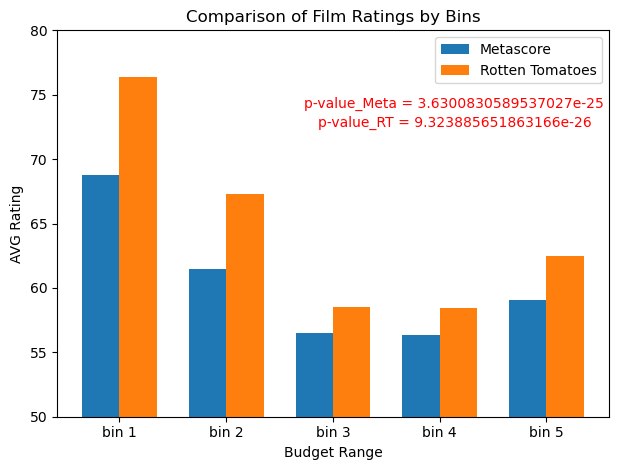

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

bins = sorted(budget_analysis_main_df["budget_bins"].unique())
mean_by_meta = budget_analysis_main_df.groupby("budget_bins")["Metascore_O"].mean()
mean_by_RT = budget_analysis_main_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()

mean_by_RT = budget_analysis_main_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()

overall_RT_mean = round(budget_analysis_main_df["Rotten_Tomato_O"].mean(), 2)

groups = [budget_analysis_main_df[budget_analysis_main_df["budget_bins"] == bin_value]["Rotten_Tomato_O"] for bin_value in budget_analysis_main_df["budget_bins"].unique()]

f_statistic_RT, p_value_RT = f_oneway(*groups)

print("\nANOVA results for Meta:")
print("F-statistic:", f_statistic_RT)
print("p-value:", p_value_RT)

mean_by_meta = budget_analysis_main_df.groupby("budget_bins")["Metascore_O"].mean()

overall_meta_mean = round(budget_analysis_main_df["Metascore_O"].mean(), 2)

groups = [budget_analysis_main_df[budget_analysis_main_df["budget_bins"] == bin_value]["Metascore_O"] for bin_value in budget_analysis_main_df["budget_bins"].unique()]

f_statistic_M, p_value_M = f_oneway(*groups)

print("\nANOVA result for RT:")
print("F-statistic:", f_statistic_M)
print("p-value:", p_value_M)

bar_width = 0.35

x = np.arange(len(bins))

plt.bar(x - bar_width/2, mean_by_meta, bar_width, label='Metascore')

plt.bar(x + bar_width/2, mean_by_RT, bar_width, label='Rotten Tomatoes')

plt.xlabel('Budget Range')
plt.ylabel('AVG Rating')
plt.ylim(50, 80)
plt.title('Comparison of Film Ratings by Bins')
plt.xticks(x, bins)
plt.legend()

plt.annotate(f'p-value_Meta = {p_value_M}', xy=(0.72, 0.8), xycoords='axes fraction', ha='center', color= "red")
plt.annotate(f'p-value_RT = {p_value_RT}', xy=(0.72, 0.75), xycoords='axes fraction', ha='center', color= "red")

plt.tight_layout()
plt.show()

image_name = "Meta and RT ratings by budget_bin.png"
image_path = image_directory / image_name

plt.savefig(image_path)

C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\1937397027.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()


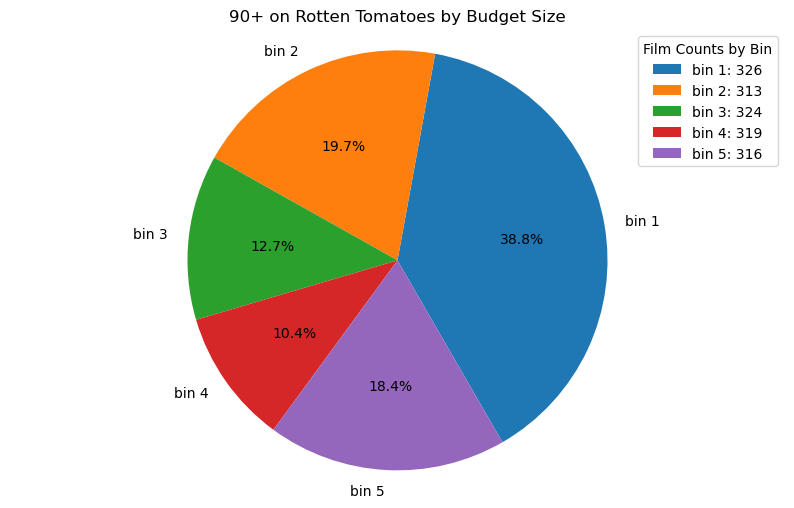

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()

# Assuming count_a_by_bin is your Series containing the counts
labels = count_a_by_bin.index  # Budget bins as labels
sizes = count_a_by_bin.values  # Counts as sizes

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=300)
ax.set_title('90+ on Rotten Tomatoes by Budget Size')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

plt.show()

image_name = "Movies scoring 90+ on RT by budget_bin.png"
image_path = image_directory / image_name

plt.savefig(image_path)



C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\2668621215.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()


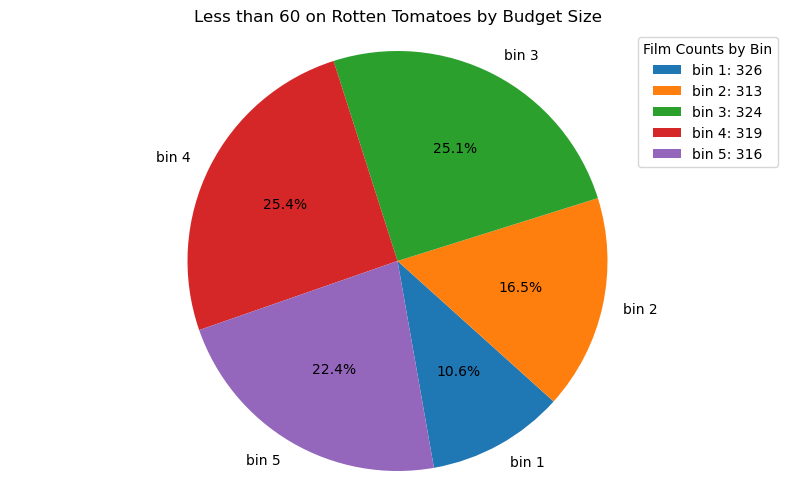

In [14]:
import matplotlib.pyplot as plt

budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()

# Assuming count_a_by_bin is your Series containing the counts
labels = count_f_by_bin.index  # Budget bins as labels
sizes = count_f_by_bin.values  # Counts as sizes

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=280)
ax.set_title('Less than 60 on Rotten Tomatoes by Budget Size')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

plt.show()

C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\1743215039.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prof_mean_bybin = budget_analysis_main_df.groupby("budget_bins")["weighted_profit"].mean()
C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\1743215039.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_data in budget_analysis_main_df.groupby("budget_bins")["weighted_profit"]:


F-statistic: 3.953649854572004
p-value: 0.0033789136573456886


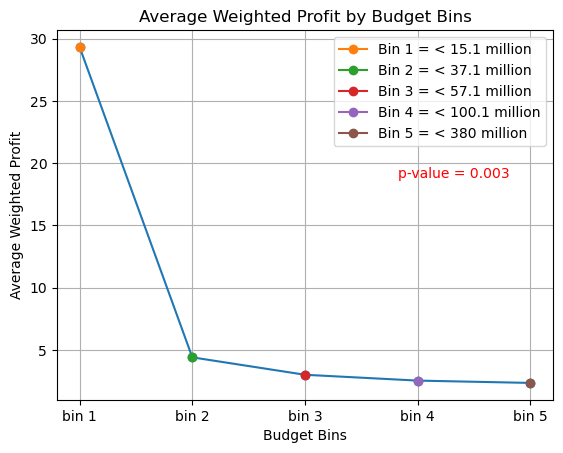

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

prof_mean_bybin = budget_analysis_main_df.groupby("budget_bins")["weighted_profit"].mean()
budget_bins_labels = ["< 15.1 million", "< 37.1 million", "< 57.1 million", "< 100.1 million", "< 380 million"]

groups = []
for group_name, group_data in budget_analysis_main_df.groupby("budget_bins")["weighted_profit"]:
    groups.append(group_data)

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Plotting
plt.plot(prof_mean_bybin.index, prof_mean_bybin.values, marker='o', linestyle='-')
plt.title('Average Weighted Profit by Budget Bins')
plt.xlabel('Budget Bins')
plt.ylabel('Average Weighted Profit')

for i, bin_label in enumerate(budget_bins_labels):
    plt.plot(prof_mean_bybin.index[i], prof_mean_bybin.values[i], marker='o', linestyle='-', label=f'Bin {i+1} = {bin_label}')

plt.annotate(f'p-value = {p_value:.3f}', xy=(0.8, 0.6), xycoords='axes fraction', ha='center', color= "red")


plt.legend()
plt.grid(True)
plt.show()

image_name = "Weighted_profit by budget_bin.png"
image_path = image_directory / image_name

plt.savefig(image_path)


In [16]:
#The absurdly high weighted_profit of Horror movies in bin 1 strongly suggests a sampling bias that, while almost undoubtedly rooted in truth to a
#good degree, nonetheless could be skewing the data.

com_mean = budget_analysis_main_df.groupby(["main_genre", "budget_bins"])["weighted_profit"].agg(['mean', 'count'])
com_mean_df = com_mean.reset_index()
com_mean_horror = com_mean_df.loc[com_mean_df["main_genre"] == "Horror", :]

print(com_mean_horror)

   main_genre budget_bins        mean  count
40     Horror       bin 1  186.897419     31
41     Horror       bin 2    5.720000     12
42     Horror       bin 3    3.322857      7
43     Horror       bin 4         NaN      0
44     Horror       bin 5         NaN      0


C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\1179481077.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  com_mean = budget_analysis_main_df.groupby(["main_genre", "budget_bins"])["weighted_profit"].agg(['mean', 'count'])


C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\2623156010.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_profit_mean_bybin = budget_analysis_main_df.groupby("budget_bins")["profit"].mean().astype(int)
C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\2623156010.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_data in budget_analysis_main_df.groupby("budget_bins")["profit"]:


F-statistic: 116.82337375888801
p-value: 1.9036538834079957e-87


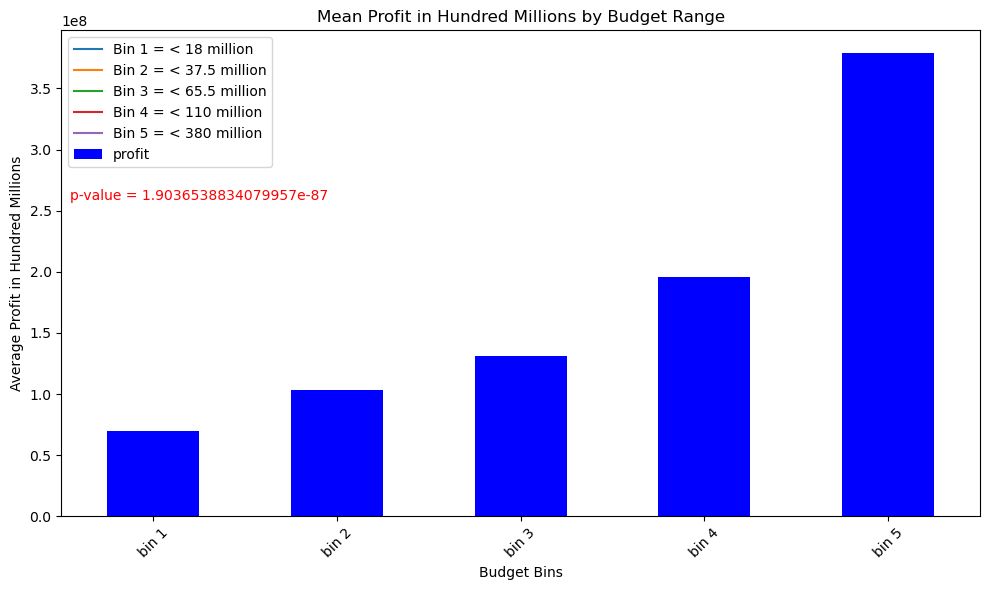

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Sample data
total_profit_mean_bybin = budget_analysis_main_df.groupby("budget_bins")["profit"].mean().astype(int)
budget_bin_labels = ["< 18 million", "< 37.5 million", "< 65.5 million", "< 110 million", "< 380 million"]

groups = []
for group_name, group_data in budget_analysis_main_df.groupby("budget_bins")["profit"]:
    groups.append(group_data)

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Plotting
plt.figure(figsize=(10, 6))
bars = total_profit_mean_bybin.plot(kind='bar', color='blue')
plt.xlabel("Budget Bins")
plt.ylabel("Average Profit in Hundred Millions")
plt.title("Mean Profit in Hundred Millions by Budget Range")
plt.xticks(rotation=45)

for i, bin_label in enumerate(budget_bin_labels):
    plt.plot(prof_mean_bybin.index[i], prof_mean_bybin.values[i], label=f'Bin {i+1} = {bin_label}')

plt.annotate(f'p-value = {p_value}', xy=(0.15, 0.65), xycoords='axes fraction', ha='center', color= "red")

plt.legend()


plt.tight_layout()
plt.show()

image_name = "Overall profit by budget_bin.png"
image_path = image_directory / image_name

plt.savefig(image_path)


C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\3076892778.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()


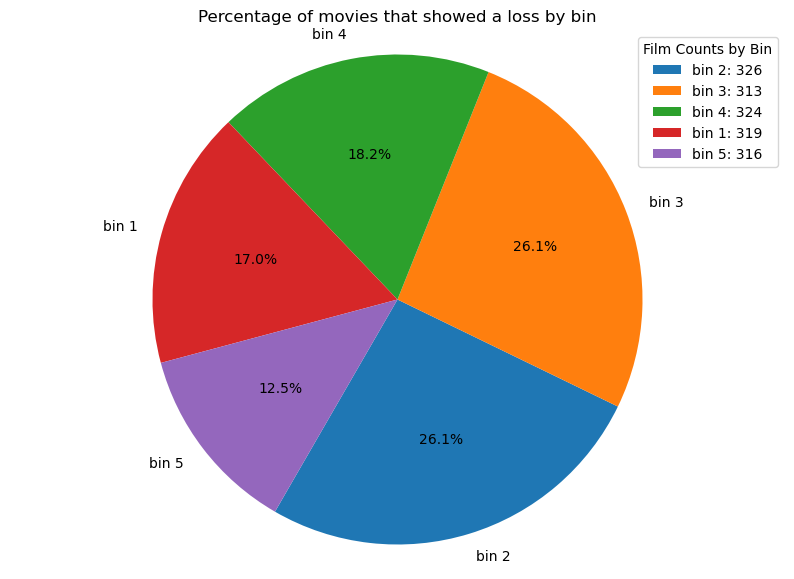

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

profit_loss = budget_analysis_main_df.loc[budget_analysis_main_df["profit"] < 0, :]
movie_counts_by_bin_loss = profit_loss["budget_bins"].value_counts()

budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()

labels = movie_counts_by_bin_loss.index 
sizes = movie_counts_by_bin_loss.values 

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240)
ax.set_title('Percentage of movies that showed a loss by bin')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

plt.show()

image_name = "Breakdown of movies showing a loss by budget_bin.png"
image_path = image_directory / image_name

plt.savefig(image_path)

In [19]:
#Running a chi square on the distribution of profit_loss movies across budget ranges

profit_loss = budget_analysis_main_df.loc[budget_analysis_main_df["profit"] < 0, :]
movie_counts_by_bin_loss = profit_loss["budget_bins"].value_counts()
chi_bins_df = pd.DataFrame(movie_counts_by_bin_loss)
chi_bins_df.columns = ["actual"]
chi_bins_df["expected"] = 17.6

chi_square_stat, p_value = stats.chisquare(chi_bins_df['actual'], chi_bins_df['expected'])
critical_value = stats.chi2.ppf(q = 0.95, df = 4)

print("Chi-Square Statistic:", chi_square_stat)
print("p-value:", p_value)
print("Critical Value (95% confidence):", critical_value)

Chi-Square Statistic: 6.3181818181818175
p-value: 0.17661299835216132
Critical Value (95% confidence): 9.487729036781154


In [20]:
#A Python function to quickly return some relevant metrics by genre to begin to analyze the relationship between budget and performance by genre

def genre_stats(genre):
    genre_profit = budget_analysis_main_df.loc[budget_analysis_main_df["main_genre"] == genre, :]
    genre_count = genre_profit["main_genre"].count()
    genre_profit_budget = round(genre_profit["budget"].mean(),2)
    genre_profit_revenue = round(genre_profit["revenue"].mean(), 2)
    genre_profit_weighted = round(genre_profit_revenue/genre_profit_budget, 2)
    
    return f"AVG Budget: {genre_profit_budget}\n AVG Revenue: {genre_profit_revenue}\n Weighted Profit: {genre_profit_weighted}\n Count: {genre_count}"

print(genre_stats("Drama"))

AVG Budget: 29255202.58
 AVG Revenue: 134923236.0
 Weighted Profit: 4.61
 Count: 224


Slope: -0.0000008143


c:\Users\stoyt\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


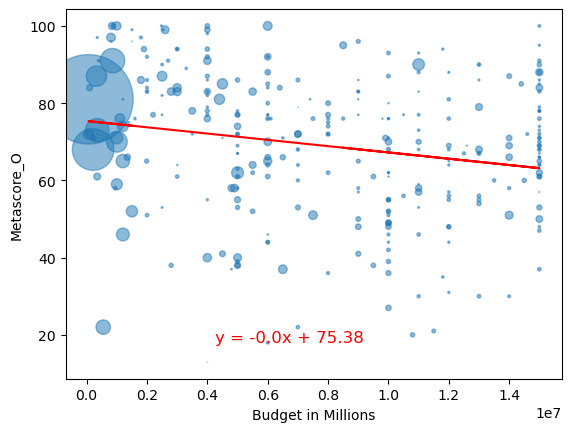

In [21]:
from scipy.stats import linregress
bin_1_data = budget_analysis_main_df[budget_analysis_main_df["budget_bins"] == "bin 1"]
x_values = bin_1_data["budget"]
y_values = bin_1_data["Metascore_O"]
profit_bin_1 = bin_1_data["weighted_profit"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, s=profit_bin_1, alpha=0.5)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0.3, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.xlabel('Budget in Millions')
plt.ylabel('Metascore_O')
print(f"Slope: {slope:.10f}")
plt.show()

Slope: 0.0000000410


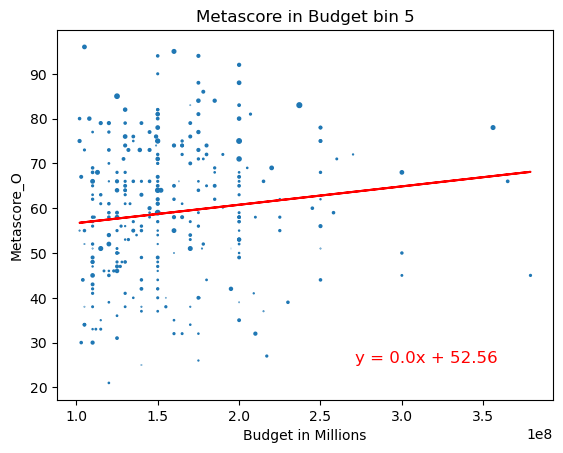

In [22]:
from scipy.stats import linregress

bin_5_data = budget_analysis_main_df[budget_analysis_main_df["budget_bins"] == "bin 5"]

budget_bin_5 = bin_5_data["budget"]
score_bin_5 = bin_5_data["Metascore_O"]
profit_bin_5 = bin_5_data["weighted_profit"]

# Add the linear regression equation and line to plot
x_values = budget_bin_5
y_values = score_bin_5
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, s=profit_bin_5, alpha=0.99999999)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.6, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.title("Metascore in Budget bin 5")
plt.xlabel('Budget in Millions')
plt.ylabel('Metascore_O')
print(f"Slope: {slope:.10f}")

Slope: -0.0000000341


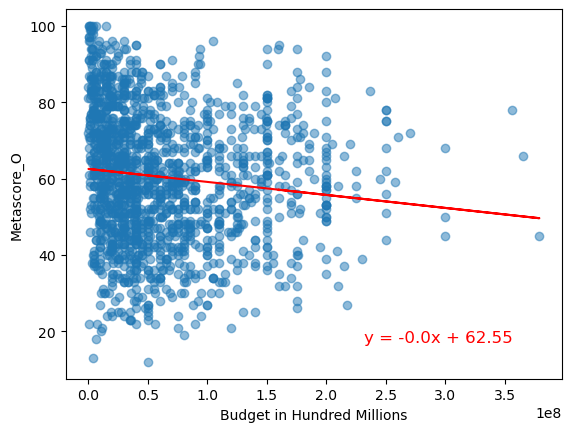

In [23]:
from scipy.stats import linregress

budget_data = budget_analysis_main_df["budget"]
score_data = budget_analysis_main_df["Metascore_O"]
profit_data = budget_analysis_main_df["weighted_profit"]

# Add the linear regression equation and line to plot
x_values = budget_data
y_values = score_data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.6, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.xlabel('Budget in Hundred Millions')
plt.ylabel('Metascore_O')
print(f"Slope: {slope:.10f}")

image_name = "Metascore across all budget_bins.png"
image_path = image_directory / image_name

plt.savefig(image_path)

C:\Users\stoyt\AppData\Local\Temp\ipykernel_17824\1447716487.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = budget_analysis_main_df.groupby("budget_bins")["weighted_profit"].apply(list)


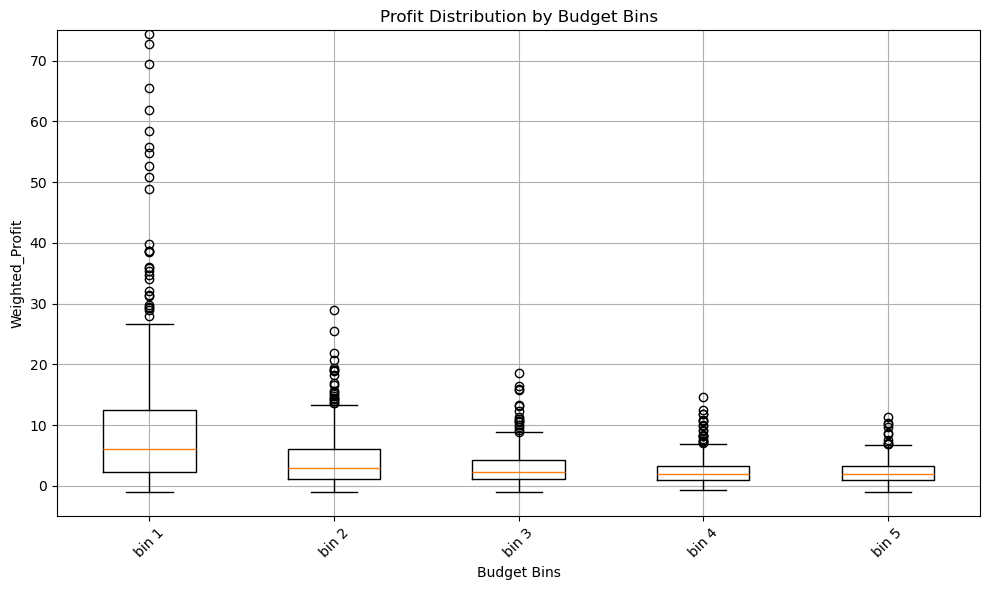

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

data = budget_analysis_main_df.groupby("budget_bins")["weighted_profit"].apply(list)

# Plotting the box plots
plt.figure(figsize=(10, 6))

# Create box plots
plt.boxplot(data.values)

# Set labels and title
plt.xlabel("Budget Bins")
plt.ylabel("Weighted_Profit")
plt.ylim(-5, 75)
plt.title("Profit Distribution by Budget Bins")
plt.xticks(range(1, len(data) + 1), data.index)  # Set x-ticks as bin labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

image_name = "Boxplot of weighted_profit across budget_bins.png"
image_path = image_directory / image_name

plt.savefig(image_path)


In [25]:
for i, (bin_label, bin_data) in enumerate(data.items()):
    quartiles = pd.Series(bin_data).quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"Bin {bin_label}:")
    print(f"The lower quartile of data is: {lowerq}")
    print(f"The upper quartile of data is: {upperq}")
    print(f"The interquartile range of data is: {iqr}")
    print(f"The the median of data is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

plt.tight_layout()
plt.show()

Bin bin 1:
The lower quartile of data is: 2.2725
The upper quartile of data is: 12.535
The interquartile range of data is: 10.2625
The the median of data is: 6.09
Values below -13.12125 could be outliers.
Values above 27.92875 could be outliers.
Bin bin 2:
The lower quartile of data is: 1.13
The upper quartile of data is: 6.03
The interquartile range of data is: 4.9
The the median of data is: 2.9
Values below -6.220000000000001 could be outliers.
Values above 13.38 could be outliers.
Bin bin 3:
The lower quartile of data is: 1.0550000000000002
The upper quartile of data is: 4.192500000000001
The interquartile range of data is: 3.1375000000000006
The the median of data is: 2.22
Values below -3.6512500000000006 could be outliers.
Values above 8.898750000000001 could be outliers.
Bin bin 4:
The lower quartile of data is: 0.895
The upper quartile of data is: 3.295
The interquartile range of data is: 2.4
The the median of data is: 1.93
Values below -2.7049999999999996 could be outliers.
Val

<Figure size 640x480 with 0 Axes>

Brief Budget Data Analysis:

Anova tests on the ratings measurements in the established budget ranges did allow for a rejection of the null hypothesis.  Thus, it would appear at least preliminarily that lower budget movies did exceed their counterparts on both Rotten Tomatoes and Metascore.  No testing was done as regards the validity of Rotten Tomatoes versus Metascore, but the bar chart did interestingly show a similar shape in the data.  Moviegoers did rate lower budget movies more highly than higher budget movies as did critics (Metascore).  The Metascore ratings showed a similar disposition with the only difference being Metascores were typically lower while following a similar pattern.

Testing on profitibility once again allowed for the rejection of the null hypothesis with lower budget movies showing an almost ridiculous derivation from the other bins in this sample in weighted_profit (profit / budget).  This number was perhaps skewed by the performance of Horror movies in bin 1 as movies in that data set showed a weighted_profit of just over 171.  Obviously, that number suggests a bias in the sample and does suggest that outrageously successful horror movies were oversampled in the data set used for this analysis.  Still, I would expect for the overall trend of lower budget movies performing well and far outdistancing higher budget movies in this metric to persist across different data sets.

Overall profit expressed as a total dollar amount greatly explained the existence of blockbuster films.  This metric followed a far more linear progression with bin 5 movies (highest budget) producing an average profit five times greater than the average returned by movies in bin 1 (which again were perhaps inordinately successful lower budget movies when taken against an overall norm).  Moreover, each successive bin moving up from bin 1 saw a clear increase in overall profitability.  Finally, an interesting note as it was found that the highest budget range movies not only produced the highest gross profit, but also showed the least likelihood of showing a loss.  Movies that lost money were fairly evenly distributed among the first four bins, but it was the highest bin that contained the fewest amount of films that actually lost money.  So, they are highly profitable and it would seem, a fairly safe investment.  A chi square was performed on the distribution of movies (count) in the budget bins and a null hypothesis that the movies were evenly distributed was not rejected.

Scatter charts were done analyzing Metascore performance across the budget bins of all movies in the data set and showed no discernible pattern at all.  A slope rating that hovered near zero was found overall as well as specifically in bin 1 and bin 5.  In a few different measures, the data seemed to show over and over that budget and viewer satisfaction (higher ratings) bore no relationship and to the extent that a relationship exists, moviegoers and critics alike were more prone to rate lower budget movies more highly.  It is entirely possible that movie genre has a significant impact here as well as a kind of purchase intent.  Do people tend to show greater agency in seeking out movies that are not marketed as aggressively and therefore have to be "found" by viewers?  Motivation to see something could have a significant impact on how much you like it, as does a penchant to seek out movie genres that we like.  Recall that blockbuster movies make the most money, but don't produce the highest viewer ratings.  So, we are all going to see Avatar apparently, but only some of us are making it a point to go see a lower budget horror movie or an independent drama that isn't being widely advertised, or simply just doesn't seem as appealing to the average moviegoer.  Is motivation to see a movie a significant driver of how much we tend to like it?

Finally, a boxplot showed significant variablity in data points from the lower bins decreasing as budget ranges went up.  This again highlights a potential reliability issue with the data set suggesting the presence of too many well known lower budget films that exceeded expectations particularly as regards profitibility.  Tailoring a data set to mirror the population of movies released overall would seem like one logical next step.